# Курсовая работа по информатике

### Задание № 1

Метод наименьших квадратов - математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от экспериментальных входных данных. Задача МНК состоит в то, что необходимо найти такие коэффициенты линейной зависимости, при которых значение функции двух переменных будет наименьшим. 

По данным метеонаблюдений и гидрологии методом наименьших квадратов построим кривую, которая будет наилучшим образом описывать поведение исходных данных. 

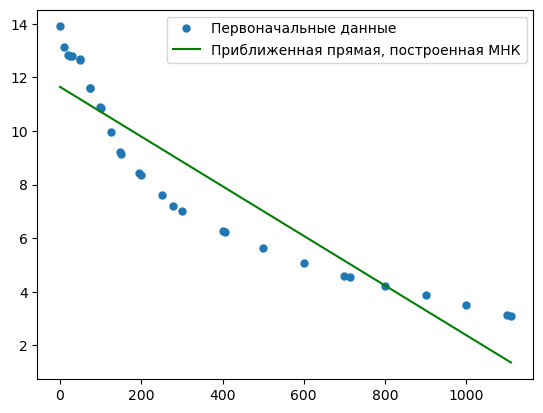

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file1 = pd.read_excel('https://raw.githubusercontent.com/DaryaKorel/MSU-2023/main/MNK.xlsx')
#print(file1)

C = np.copy(file1)
x = np.float64([i[0] for i in C])
y = np.float64([i[1] for i in C])

A = np.vstack([x, np.ones(len(x))]).T  # объединяем столбец х со столбцом единиц для дальнейшего применения МНК
k, b = np.linalg.lstsq(A, y, rcond=None)[0] # строим МНК

f = plt.plot(x, y, 'o', label='Первоначальные данные', markersize=5)  # строим график
f = plt.plot(x, k*x + b, 'g', label='Приближенная прямая, построенная МНК')
f = plt.legend()
plt.show()

Вывод: с помощью метода наименьших квадратов у нас получилось аппроксимировать исходные данные в виде линейной зависимости y=kx+b

### Задание № 2

Интерполяция - это способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений. Чтобы решить задачу интерполяции используем интерполяционный многочлен Лагранжа.

Интерполяционный многочлен Лагранжа — многочлен минимальной степени, принимающий заданные значения в заданном наборе точек.

По данным показателя солености воды с помощью интерполяционного многочлена Лагранжа найдём пропущенные значения и построим график.

In [1]:
import pandas as pd
file2 = pd.read_excel('https://raw.githubusercontent.com/DaryaKorel/MSU-2023/main/Lagrange.xlsx')
#print(file2.head())
print(file2)

    Salinity  Pres
0      233.0     0
1      232.5     8
2      232.8    10
3      234.1    19
4      234.0    20
5        0.0    30
6      233.0    39
7      231.0    50
8      228.5    58
9      220.1    75
10     218.6    78
11     211.2   101
12     204.5   118
13     198.2   126
14     178.3   151
15     176.7   153
16     173.6   201
17       0.0   222
18     166.8   252
19     158.9   287
20     155.7   302
21     139.6   376
22     135.4   403
23     122.4   504
24     114.0   603
25     113.9   605
26     107.8   706
27     101.5   807
28      95.4   904


Интерполированное значение в точке 30.0 это 0.0.
Интерполированное значение в точке 222.0 это 0.0.


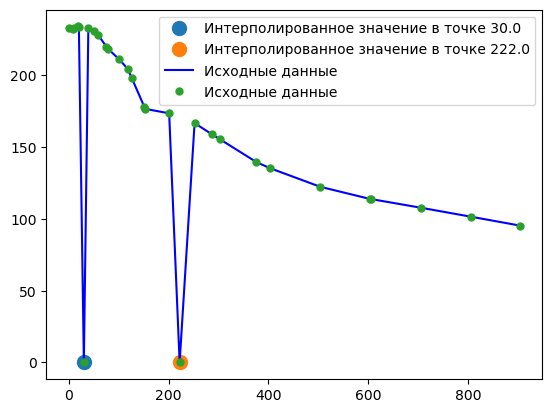

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file2 = pd.read_excel('https://raw.githubusercontent.com/DaryaKorel/MSU-2023/main/Lagrange.xlsx')

C = np.copy(file2)
x = np.float64([i[1] for i in C])
y = np.float64([i[0] for i in C])

n = len(x)

def lagrange(xp, yp):
    j = 0
    i0 = 0
    l = 1
    while (j < n):
        if i0 != j:
            l = l * (xp - x[j])/(x[i0] - x[j])
        j = j + 1
    return l * y[i0]

for i in range(n):
    if y[i] == 0:
        y = y + lagrange(x[i], y[i])
        print('Интерполированное значение в точке %.1f это %.1f.' % (x[i], y[i]))
        f = plt.plot(x[i], y[i], 'o', label = 'Интерполированное значение в точке ' + str(x[i]), markersize=10)
    
f = plt.plot(x, y, 'b', x, y, 'o', label = 'Исходные данные', markersize=5)
f = plt.legend()        
plt.show()

Вывод: интерполяционный многочлен Лагранжа - это очень удобный способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений.